In [1]:
using Plots, PlotRecipes
pyplot()
using LaTeXStrings;
using TaylorSeries

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /Users/usuario/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /Users/usuario/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
"""Función que define el mapeo de Henon en 2D"""
function Henon_map(x,y,a,b)
    fx=y+1-a*x^2
    fy=b*x
    return fx,fy
end 

Henon_map (generic function with 1 method)

In [117]:
"""función que itera N veces el mapeo de Henon a partir de una condición inicial (x0,y0) 
con parámetros a,b"""
function iter_Henon(x0,y0,a,b,N)
    Henon_ab(x,y)=Henon_map(x,y,a,b)
    xx=Float64[]
    yy=Float64[]
    push!(xx,x0)
    push!(yy,y0)
    x,y=Henon_ab(x0,y0)
    for i in 1:N
        x,y=Henon_ab(x,y)
        if abs(x)<1e-10
            push!(xx,0.0)
        else
            push!(xx,x)
        end 
        if abs(y)<1e-10
            push!(yy,0.0)
        else
            push!(yy,y)
        end 
    
    end 
    return xx,yy
end 

iter_Henon (generic function with 1 method)

In [57]:
Arange=-2:1/2^10:2
M=10000
Nlast=500
a=1.4
x0=0.
y0=0.
b=0.3

0.3

In [60]:
xx,yy=iter_Henon(x0, y0, a, b, 10000);

([0.0,-0.4,1.076,-0.740886,0.554322,0.347552,0.997188,-0.287871,1.18314,-1.0461  …  -0.444516,0.38208,0.662266,0.500588,0.847856,0.143773,1.22542,-1.05918,-0.20297,0.624572],[0.0,0.3,-0.12,0.3228,-0.222266,0.166297,0.104265,0.299156,-0.0863614,0.354942  …  -0.341289,-0.133355,0.114624,0.19868,0.150176,0.254357,0.043132,0.367625,-0.317753,-0.0608909])

In [ ]:
"""función que itera m veces un mapeo f(x) a patir de una condición inicial x_0
Devuelve los puntos x_n para toda n=1,2,...m en forma en un arreglo xvec"""
function iter_map(f::Function,x_0::Float64,m::Int)
    x=x_0
    xvec=Float64[]
    fvec=Float64[]
    push!(xvec,x)
    for i in 1:m
        x=f(x)
        if abs(x)<1e-10
            push!(xvec,0.0)
        else
        push!(xvec,x)
        end 
    end 
    return xvec
end 
        

In [279]:
"""Funcion que devuelve un arreglo `diagBif´ con los últimos Nlast iterados de un mapeo f(x,c),
en donde c es un párametro. También devuelve un arreglo `cs´ que permite graficar el diagrama
de bifurcaciones
Los parámetros de entrada son los siguientes: 
-) f(x,c): la función a evaluar
-) crange: rango en el que se tomaran los valores del parámetro c
-) M: el número de iteraciones del mapeo
-) x0: la condición inicial
-) Nlast: los últimos iterados que se desea iterar para obtener las orbitas del diagrama de 
bifurcaciones
"""
function Bif_diag(Arange,M,x0,y0,b,Nlast)
diagBifX=Float64[]
diagBifY=Float64[]
As=Float64[]
    for a in Arange
        x=x0
        y=y0
        for i in 1:M
        x,y=Henon_map(x,y,a,b)
        end 
        for i in 1:Nlast
            push!(As,a)
            x,y=Henon_map(x, y, a, b)
            push!(diagBifX,x)
            push!(diagBifY,y)
        end
    end
    return As,diagBifX,diagBifY
end 

Bif_diag (generic function with 2 methods)

# NOTA: Necesitamos definir los parámetros $a$ que sirven para que el mapeo no diverja

## Puntos fijos y estabilidad del Mapeo de Henon.

In [296]:
function Fixed_points(a,b)
    xf1=-(1-b)/(2a)+(1/2a)*sqrt((1-b)^2+4a)
    xf2=-(1-b)/(2a)-(1/2a)*sqrt((1-b)^2+4a)
    yf1=b*xf1
    yf2=b*xf2
    return (xf1,yf1),(xf2,yf2)
end 

Fixed_points (generic function with 1 method)

In [287]:
function Jacobian_henon(x,y,a,b)
    Df=[[-2a*x,b] [1,0]]
    return Df
end 

Jacobian_henon (generic function with 1 method)

In [293]:
function Det_Jacobian(b)
    return -b
end 

Det_Jacobian (generic function with 1 method)

In [311]:
function EigenVals_JacHen(x,y,a,b)
    λ₁=-a*x+sqrt((a*x)^2+b)
    λ₂=-a*x-sqrt((a*x)^2+b)
    return λ₁,λ₂
end 

EigenVals_JacHen (generic function with 1 method)

La estabilidad de los putnos fijos la estudiaremos con el criterio de  "Lyapunov stability". De acuerdo a aeste criterioLos puntos fijos son estables si la norma de los eigenvalores del determinante de la matriz Jacobiana valuada en los puntos fijos es menor a uno [Veáse esta referencia ](https://en.wikipedia.org/wiki/Lyapunov_stability#Stability_for_linear_state_space_models). Esto es. un punto fijo $\vec{x_0}$ es estable si $|\lambda|<1$ para todo $\lambda$, en donde $\lambda$  eigenvalor de la matriz Jacobiana del mapeo de Hénon: 

\begin{equation}
DH(\vec{x_0}) = \left( 
\begin{array}{cc}
-2ax_0 & 1 \\
b & 0
\end{array} 
\right).
\end{equation}

In [303]:
a=1.4
b=0.3

0.3

In [312]:
xf1,xf2=Fixed_points(a,b);

In [309]:
xf1

(0.6313544770895047,0.1894063431268514)

In [313]:
xf2

(-1.1313544770895048,-0.3394063431268514)

In [314]:
λ1,λ2=EigenVals_JacHen(xf1[1],xf1[2],a,b)

(0.15594632230279393,-1.9237388581534067)

Por tanto vemos que el punto fijo 

$$\vec{x^*_1}=(0.63135...,0.18940...)$$ 

no es Lyapunov estable, ya que el segundo eigenvalor $\lambda_2=-1.86555...$ tiene norma mayor a uno.

Para el segundo punto fijo se tiene que los eigenvalores estan dados por:

In [315]:
λ3,λ4=EigenVals_JacHen(xf2[1],xf2[2],a,b)

(3.259822097891452,-0.09202956204083912)

Por tanto vemos que eel segundo punto fijo correspondiente a 

$$\vec{x^*_2}=(-1.13135...,-0.33940...)$$

no es Lyapunov estable ya que el eigenvalor $\lambda_3=3.25982...$ tiene norma mayor a uno.

Ahora veamos que pasa con la iteración de una condición inicial, digamos $\vec{x}_0$. Iteremos N veces el mapeo de Hénon con los parámetros $a=1.4$,  $b=0.3$ y pintemos la órbita que se dibuja en el espacio fase $XY$:



In [206]:
Arange=0:1/2^14:1.4

0.0:6.103515625e-5:1.39996337890625

In [272]:
M=100000
Nlast=250
x0=0.1
y0=0.1
b=0.3

0.3

In [280]:
as,xbif,ybif=Bif_diag(Arange, M, x0, y0, b, Nlast) ; #revisar la funcion Bif diag para hacerla 
#mas rapida

([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0  …  1.39996,1.39996,1.39996,1.39996,1.39996,1.39996,1.39996,1.39996,1.39996,1.39996],[1.42857,1.42857,1.42857,1.42857,1.42857,1.42857,1.42857,1.42857,1.42857,1.42857  …  0.605086,0.680527,0.533179,0.806177,0.250088,1.15429,-0.790276,0.47196,0.451081,0.856732],[0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571,0.428571  …  0.193095,0.181526,0.204158,0.159954,0.241853,0.0750264,0.346288,-0.237083,0.141588,0.135324])


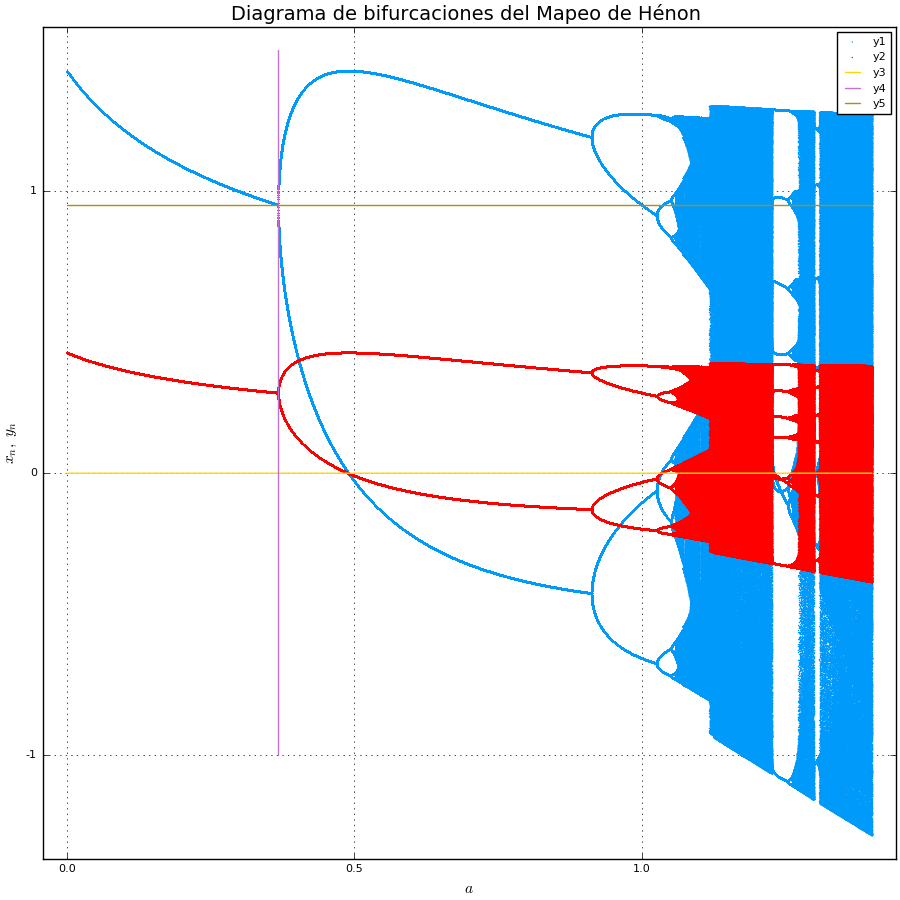

In [282]:
scatter(as,xbif, markersize=1,markerstrokecolor=false,size=(900,900))#,xlim=(1,1.1))
scatter!(as,ybif,markersize=1,markerstrokecolor=false,color=:red)
plot!(as,zeros(length(as)),c=:gold,xlim=(0.367,0.368))
#(0.36597228673036497,0.366084517823527)
#(0.36735732327485593,0.3673686471347857)
plot!([0.3673686471347857,0.3673686471347857],[-1,1.5])
plot!([0,1.4],[0.952473, 0.952473])
xlabel!(L"a")
ylabel!(L"x_n, \ y_n")
title!("Diagrama de bifurcaciones del Mapeo de Hénon ")


In [263]:
"""esta función calcula la longitud de la orbita solamente en las X de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{n+i} para determinar la longitud de la orbita en as X.
"""
function orbit_lengthX(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        cont=cont+1
        #xf=xorbit
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_lengthX (generic function with 2 methods)

In [269]:
b=0.3
a=0.3674
orb=500000
orbit_lengthX(0,0,a,b,Norb)

1

In [270]:
xx,yy=iter_Henon(0,0, a, b, Norb)

([0.0,0.6326,1.15297,0.701378,1.16516,0.711635,1.16349,0.716141,1.16062,0.719938  …  0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446,0.952446],[0.0,0.3,0.18978,0.345892,0.210413,0.349547,0.213491,0.349046,0.214842,0.348187  …  0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734,0.285734])

In [271]:
xx

500001-element Array{Float64,1}:
 0.0     
 0.6326  
 1.15297 
 0.701378
 1.16516 
 0.711635
 1.16349 
 0.716141
 1.16062 
 0.719938
 1.15776 
 0.723516
 1.155   
 ⋮       
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446
 0.952446

In [265]:
xx[end-30]

0.9524733864226376

In [257]:
abs(xx[end]-xx[end-1])

2.1100898806025725e-12

In [148]:
orbit_lengthY(0,0,a,b,10000)

4

In [147]:
"""esta función calcula la longitud de la orbita solamente en las Y de la iteración del 
mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las y_{n+i} para determinar la longitud de la orbita en as Y.
"""
function orbit_lengthY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    cont=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(yf-yorbit)>tol
        cont=cont+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if cont>6*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    return cont
end 
      

orbit_lengthY (generic function with 2 methods)

In [179]:
"""esta función calcula las longitudes de las orbitas en las X's y en las Y's de la iteración 
del mapeo de Hénon a partir de una condición inicial (x0,y0) y dos parámetros (a,b). La función 
itera Norb veces la condición inicial y a partir de ahí ve los valores distintos 
de las x_{Norb+i} y als y_{Norb+i} para determinar la longitud de la orbita en las X y en las Y
"""
function orbit_lengthXY(x0,y0,a,b,Norb)
    HenAB(x,y)=Henon_map(x,y,a,b)
    x=x0
    y=y0
    tol=1e-8
    contX=1
    contY=1
    for i in 1:Norb
        x,y=HenAB(x,y)
    end 
    xf=x
    yf=y
    xorbit,yorbit=HenAB(xf,yf)
    while abs(xf-xorbit)>tol
        contX=contX+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contX>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    xorbit,yorbit=HenAB(xf,yf)
    
    while abs(yf-yorbit)>tol
        contY=contY+1
        xorbit,yorbit=HenAB(xorbit,yorbit)   
        if contY>10*1024+1
            #println("numero de iterados insuficiente")
            break
        end 
    end 
    
    
    return contX,contY
end 
      

orbit_lengthXY (generic function with 1 method)

In [248]:
x0=0
y0=0
b=0.3
a=0.3673573522874076
Norb=100000
orbX,orbY=orbit_lengthXY(x0, y0, a, b, Norb) 

(1,1)

In [213]:
"""funcion que determina (si es que existe) el punto de bifurcación (en la variable x o en la 
variable y) del mapeo de Henon.
entre dos valores de parámetro a1 y a2 con Norb iteraciones a partir de la condicion inicial
(x0,y0)
En caso de existir bifurcación, la función devuelve el valor del parámetro 
'Ab' en donde se presenta la bifurcación
NOTA: Funciona mejor con Norb>1000000"""

function point_bif(x0,y0,a1,a2,Norb)
     tol=1e-14
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
        if (L1x-L2x)==0 #para las X's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
        if LmedX==L1x
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
        else LmedX==L2x
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbX=(c1+c2)/2
    
    
    L1x,L1y=orbit_lengthXY(x0, y0, a1, b, Norb)
    L2x,L2y=orbit_lengthXY(x0, y0, a2, b, Norb)
    c1=a1
    c2=a2
    if (L1y-L2y)==0 #para las Y's
            nothing
        else
             while abs(c1-c2)>tol
            cmed=(c1+c2)/2
            LmedX,LmedY=orbit_lengthXY(x0, y0, cmed, b, Norb) 
            if LmedY==L1y
            c1=cmed
                L1x,L1y=orbit_lengthXY(x0, y0, c1, b, Norb) 
                else LmedY==L2y
            c2=cmed
                L2x,L2y=orbit_lengthXY(x0,y0,c2,b,Norb)
        end  
        end
    end 
    cbY=(c1+c2)/2
    return cbX,cbY
    
end 

point_bif (generic function with 1 method)

In [244]:
a1=0.36
a2=0.3674868088693479
Norb=100000

100000

In [245]:
@time point_bif(x0, y0, a1, a2, Norb) 

  5.686187 seconds (82.29 M allocations: 1.961 GB, 13.74% gc time)


(0.3673573522874076,0.36736867394211875)

In [241]:
x0=0
y0=0
b=0.3
a=0.3674979
Norb=10000000
orbX,orbY=orbit_lengthXY(x0, y0, a, b, Norb) 

(1,1)

In [215]:
"""Función que calcula los parámetros de Feigenbaum con los puntos superestables dados 
en un arreglo cs"""
function fn_ratio(cn)
    fn=Float64[]
    for i in 1:length(cn)-2
        ratio=(cn[i]-cn[i+1])/(cn[i+1]-cn[i+2])
        push!(fn,ratio)
    end 
    return fn
end


fn_ratio (generic function with 1 method)

100000

In [43]:
xx,yy=iter_Henon(x0, y0, a, b, N);


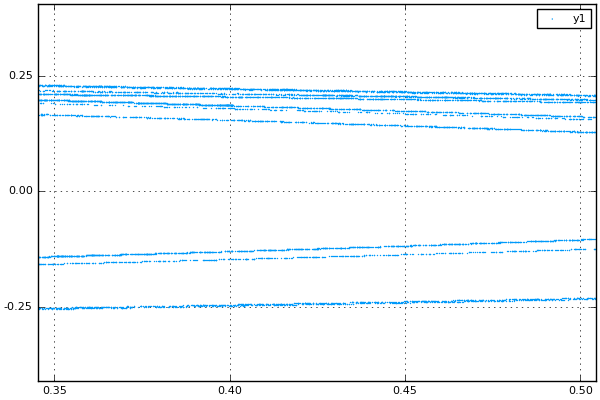

In [44]:
scatter(xx,yy,ms=1,markerstrokecolor=false,xlim=(0.35,0.5))


In [ ]:
scatter(cs,diagBif, markersize=0.05, xaxis=(L"c"), 
ylabel=L"x",title=(L"Diagrama de bifurcaciones de $f(x,c) = x^2 + c$"),size=(900,900))
plot!(ces,zeros(length(ces)),c=:gold)
xlabel!(L"c")
ylabel!(L"x_n")
